#### Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

when should it used? <br>
It assumes that the data are missing completely at random(MCAR)

In [84]:
import pandas as pd
import numpy as np

In [85]:
df = pd.read_csv('titanic.csv', usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [86]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [87]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [88]:
df['Age'].dropna().sample(df['Age'].isnull().sum())
# Replacing those NAN vaues with random sample values

817    31.0
799    30.0
377    27.0
820    52.0
641    24.0
       ... 
341    24.0
441    20.0
296    23.5
348     3.0
885    39.0
Name: Age, Length: 177, dtype: float64

In [89]:
df['Age'].isnull().sum()

177

In [90]:
df['Age'].dropna().sample()   # Picking random NAN value

765    51.0
Name: Age, dtype: float64

In [91]:
def impute_nan(df,variable,median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_random'] = df[variable]
    
    ## It will have the random sample to fill
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state = 0)

    ## Pandas need to have some index in oredr to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [92]:
median = df.Age.median()

In [93]:
impute_nan(df,"Age",median)

In [94]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [95]:
df[df['Age'].isnull()]

,Survived,Age,Fare,Age_median,Age_random
5,0,NaN,8.4583,28.0,28.00
17,1,NaN,13.0000,28.0,50.00
19,1,NaN,7.2250,28.0,0.92
26,0,NaN,7.2250,28.0,36.00
28,1,NaN,7.8792,28.0,26.00
...,...,...,...,...,...
859,0,NaN,7.2292,28.0,22.00
863,0,NaN,69.5500,28.0,25.00
868,0,NaN,9.5000,28.0,15.00
878,0,NaN,7.8958,28.0,34.00


<AxesSubplot:ylabel='Density'>

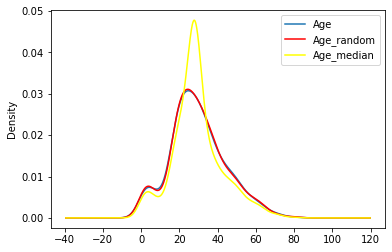

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
df.Age.plot(kind = 'kde', ax = ax, legend = True)
df.Age_random.plot(kind = 'kde', ax=ax, color = 'red', legend = True)
df.Age_median.plot(kind = 'kde', ax=ax, color = 'yellow', legend = True)

#### Advantages
1. Easy to implement
2. There is less distortion in variance

#### Disadvantages
1. Every situation randomness won't wark

#### Capturing NAN values with a new feature
It works well if the data are not missing completely at random

In [97]:
df = pd.read_csv('titanic.csv', usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [98]:
df["Age_NAN"] = np.where(df["Age"].isnull(),1,0)

In [99]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
1. Easy to implement
2. Capture the importance of missing values

#### Disadvantages
1. Creating additional feature(curse of dimensionality)

#### End Of Distribution

In [112]:
df = pd.read_csv('titanic.csv', usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [119]:
extreme = df["Age"].mean()+3*df.Age.std()

C:\Users\Pravas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

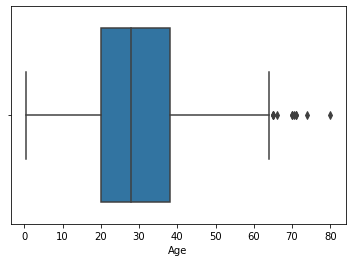

In [116]:
import seaborn as sns
sns.boxplot(df.Age)

In [125]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distributation'] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace = True)

In [126]:
impute_nan(df,'Age',median,extreme)

In [127]:
df.head(10)

,Survived,Age,Fare,Age_end_distributation
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

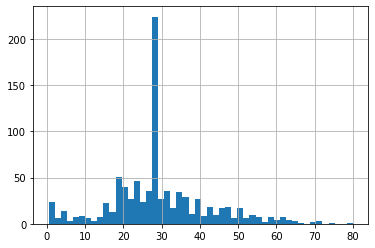

In [128]:
df.Age.hist(bins = 50)

<AxesSubplot:>

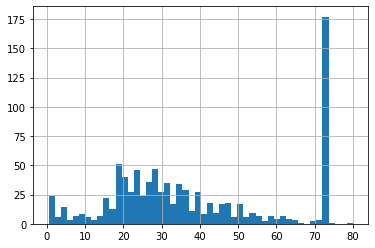

In [129]:
df.Age_end_distributation.hist(bins = 50)

C:\Users\Pravas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distributation'>

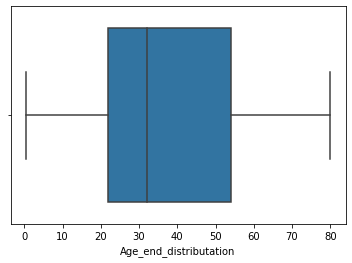

In [132]:
sns.boxplot(df['Age_end_distributation'])

#### Advantages
1. Easy to Implement
2. Capture the importance of missingness if there is one.

#### Disadvantages
1. Distorts the original distributation of the variable